# Input data

Text(0, 0.5, 'Second feature')

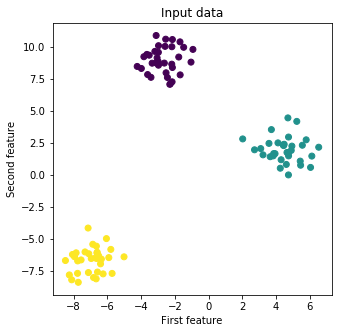

In [2]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X,y = make_blobs(random_state = 42)

plt.figure(figsize=(5,5))
plt.title("Input data")
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel("First feature")
plt.ylabel("Second feature")

# Train and test separation

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("Shape of train data: {}".format(X_train.shape))
print("Shape of test data: {}".format(X_test.shape))

Shape of train data: (75, 2)
Shape of test data: (25, 2)


# Neural network training

In [6]:
# Neural network architecture: 2-3-3

# Weights after input layer
w1 = np.array([[-0.5, 0.2, 0.4], 
               [-0.3, -0.6, 0.8]])

# Weights before output layer
w2 = np.array([[-0.4, 0.6, -0.4],
               [-0.5, 0.7, -0.3],
               [-0.3, 0.5, -0.2]])

# Activation function
def activation_function(data):
    return 1 / (1 + np.exp(-data))

# Forward propagation function
def forward_propagation(input_data):
    
    # Between input and hidden layer
    net_on_hidden_layer = np.dot(input_data, w1)
    y_on_hidden_layer = activation_function(net_on_hidden_layer)
    
    # Between hidden and output layer
    net_on_output_layer = np.dot(y_on_hidden_layer, w2)
    y_on_output_layer = activation_function(net_on_output_layer)

    return y_on_output_layer

# Back propagation function (Error-Correction)
def back_propagation(y_predicted, y_true):
    
    if y_true == 0: y_true_output = [1, 0, 0] 
    elif y_true == 1: y_true_output = [0, 1, 0] 
    else: y_true_output = [0, 0, 1] 
    error = y_true - y_predicted
    
    return error

y_pred = forward_propagation(X_train[0])
error = back_propagation(y_pred, y[0])
print(error)

[1.69671157 1.23073299 1.65881579]


# Results

Text(0, 0.5, 'Second feature')

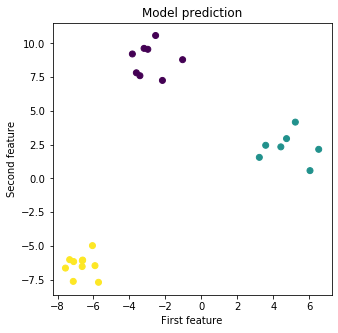

In [7]:
y_pred = y_test

plt.figure(figsize=(5,5))
plt.title("Model prediction")
plt.scatter(X_test[:,0], X_test[:,1], c = y_pred)
plt.xlabel("First feature")
plt.ylabel("Second feature")